In [2]:
import chardet

with open("/Users/kaiser/Downloads/files/S001/S001R01.edf.event", "rb") as f:
    raw_data = f.read()
    result = chardet.detect(raw_data)
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
import mne
import numpy as np

# Đường dẫn tới file .edf và .edf.event
edf_file = "/Users/kaiser/Downloads/files/S001/S001R01.edf"  # Thay bằng đường dẫn tới file .edf
event_file = "/Users/kaiser/Downloads/files/S001/S001R01.edf.event"  # Thay bằng đường dẫn tới file .edf.event

# Đọc dữ liệu EEG từ file .edf
raw = mne.io.read_raw_edf(edf_file, preload=True)  # Tải dữ liệu vào bộ nhớ
print("Thông tin tín hiệu EEG:")
print(raw.info)

# Đọc sự kiện từ file .edf.event (giả định đây là file văn bản)
events = np.loadtxt(event_file, dtype=int, encoding="ISO-8859-1")  # Điều chỉnh mã hóa nếu cần

# Kiểm tra các sự kiện
print("\nDanh sách các sự kiện (từ file .edf.event):")
print(events)

# Kết hợp sự kiện vào dữ liệu EEG
event_id = None  # Để mặc định hoặc cung cấp ánh xạ {id: label}
mne_events = mne.events_from_annotations(raw)[0]
raw.add_events(events, stim_channel=None)  # Gắn sự kiện vào dữ liệu

# Vẽ tín hiệu EEG với sự kiện
raw.plot(events=events, title="EEG with Events")

# Vẽ sự kiện
mne.viz.plot_events(events, sfreq=raw.info['sfreq'], title="EEG Events")


Extracting EDF parameters from /Users/kaiser/Downloads/files/S001/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
Thông tin tín hiệu EEG:
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>


ValueError: could not convert string '\x00X\x17ü' to int64 at row 0, column 1.

Số tín hiệu: 64
Nhãn tín hiệu: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Tần số lấy mẫu (tín hiệu đầu tiên): 160.0 Hz


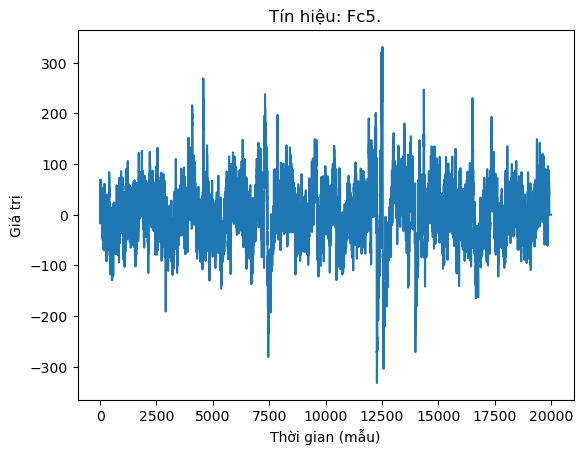

In [4]:
import pyedflib

# Đường dẫn tới file EDF
edf_path = "/Users/kaiser/Downloads/S001R12.edf"

# Mở file EDF
edf_file = pyedflib.EdfReader(edf_path)

# Lấy thông tin cơ bản
n_signals = edf_file.signals_in_file
signal_labels = edf_file.getSignalLabels()
sample_rate = edf_file.getSampleFrequency(0)

print(f"Số tín hiệu: {n_signals}")
print(f"Nhãn tín hiệu: {signal_labels}")
print(f"Tần số lấy mẫu (tín hiệu đầu tiên): {sample_rate} Hz")

# Lấy dữ liệu từ một tín hiệu
signal_index = 0  # Tín hiệu đầu tiên
signal_data = edf_file.readSignal(signal_index)

# Đóng file
edf_file.close()

# Hiển thị tín hiệu bằng Matplotlib
import matplotlib.pyplot as plt

plt.plot(signal_data)
plt.title(f"Tín hiệu: {signal_labels[signal_index]}")
plt.xlabel("Thời gian (mẫu)")
plt.ylabel("Giá trị")
plt.show()


In [5]:
import pyedflib

edf_path = "/Users/kaiser/Downloads/S001R12.edf"
edf_file = pyedflib.EdfReader(edf_path)

# Lấy danh sách các nhãn tín hiệu
signal_labels = edf_file.getSignalLabels()
print("Labels của tín hiệu:", signal_labels)

# Lấy thêm thông tin chi tiết về tín hiệu đầu tiên (ví dụ: tín hiệu tại vị trí 0)
signal_index = 0
signal_info = {
    "Label": edf_file.getLabel(signal_index),
    "Tần số lấy mẫu": edf_file.getSampleFrequency(signal_index),
    "Đơn vị đo": edf_file.getPhysicalDimension(signal_index),
    "Giá trị tối thiểu": edf_file.getPhysicalMinimum(signal_index),
    "Giá trị tối đa": edf_file.getPhysicalMaximum(signal_index),
}
print("Thông tin tín hiệu đầu tiên:", signal_info)

edf_file.close()

Labels của tín hiệu: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Thông tin tín hiệu đầu tiên: {'Label': 'Fc5.', 'Tần số lấy mẫu': 160.0, 'Đơn vị đo': 'uV', 'Giá trị tối thiểu': -8092.0, 'Giá trị tối đa': 8092.0}
